# KERAS - Fashion MINST

Test on the fashion minst (way more difficult to classify)

In [4]:
# Setup - Code imports
import numpy as np
import keras
from keras import layers
from keras import backend as K

In [5]:
from keras import backend as K

# Check keras backend and GPU avail
print(f"Current keras backend: {K.backend()}")

Current keras backend: torch


## Data preparation

In this example we will use the fashion MINST to classify Zalando's article images.
Each image is 28x28 grayscale image, associated with a label from 10 classes.

In [6]:
# Model / Data parameters
num_classes = 10 # 10 but more difficult
input_shape = (28, 28, 1)

# Load the data and split between train and test - Done automatically by keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# covert class vectors to binary class matches
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Model(s) definition

First iteration (model for MINST)

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [8]:
batch_size = 128 # Number of samples that will be propagated
epochs = 15 # How many times we will train on the train set

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6430 - loss: 1.0149 - val_accuracy: 0.8427 - val_loss: 0.4402
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8290 - loss: 0.4719 - val_accuracy: 0.8605 - val_loss: 0.3865
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8545 - loss: 0.4096 - val_accuracy: 0.8737 - val_loss: 0.3447
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8658 - loss: 0.3744 - val_accuracy: 0.8723 - val_loss: 0.3439
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8682 - loss: 0.3616 - val_accuracy: 0.8858 - val_loss: 0.3165
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8792 - loss: 0.3398 - val_accuracy: 0.8852 - val_loss: 0.3074
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8834 - loss: 0.3273 - val_accuracy: 0.8905 - val_loss: 0.2993
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8840 - loss: 0.3147 - val_accuracy: 0.

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.28230342268943787
Test accuracy: 0.8984000086784363


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


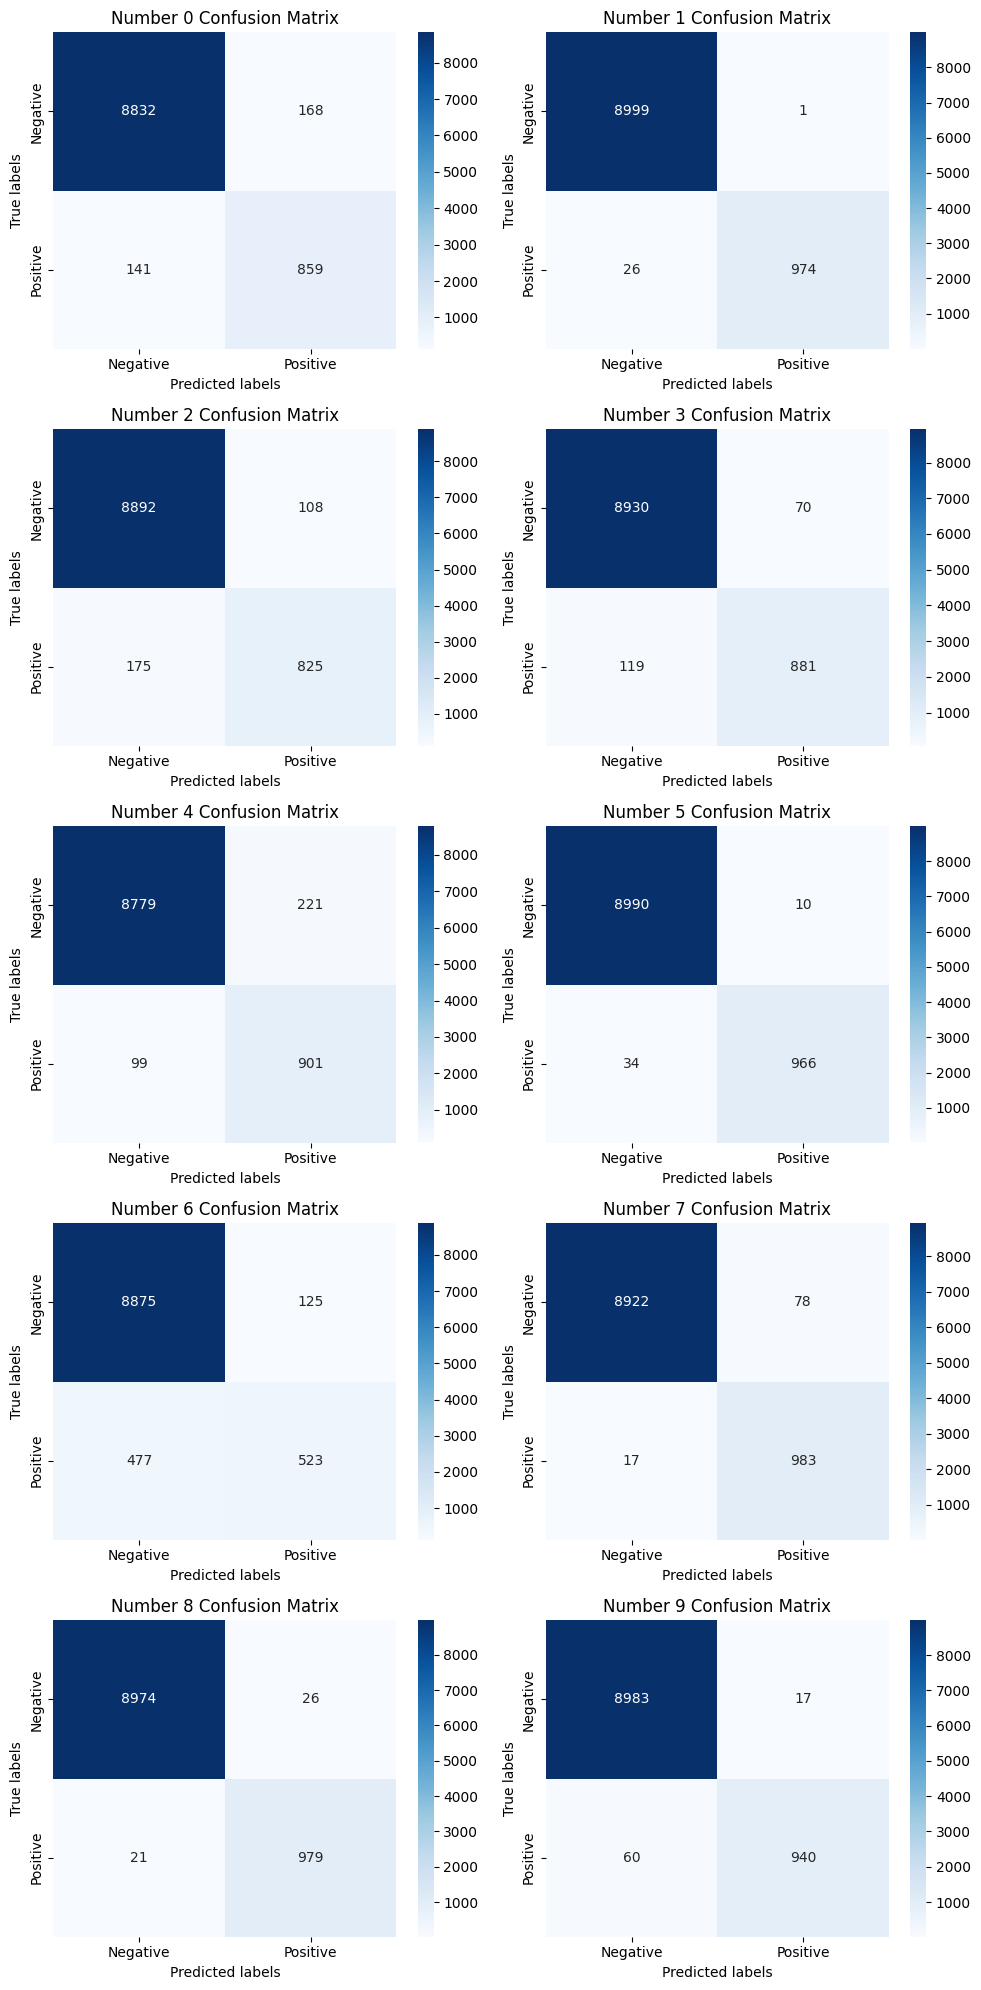

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

# My own evaluations

y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1,0) # Convert to classification 0 or 1

conf = multilabel_confusion_matrix(y_test, y_pred)

num_labels = conf.shape[0]
rows = (num_labels + 1) // 2  # Calculate the number of rows needed (with up to 2 matrices per row)

fig, axes = plt.subplots(rows, 2, figsize=(10, rows*4))  # Adjust the size accordingly

for i, matrix in enumerate(conf):
    ax = axes[i // 2, i % 2]  # Determine the row and column index
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Number {i} Confusion Matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

# If the number of labels is odd, hide the last subplot (if unused)
if num_labels % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()